In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np
import glob

In [7]:
def plot_loss(filename, ylim=None, start=0):
#     plt.figure(figsize=(15,10))
    fig, ax = plt.subplots(figsize=(15,15))
    test_filename = filename.replace("train", "test")
    data = pd.read_csv(filename, header=None)
    ax.plot(np.log10(data.iloc[start:, 0]), label="train")
    data = pd.read_csv(test_filename, header=None)
    ax.plot(np.log10(data.iloc[start:, 0]), label="test")
    ax2 = ax.twinx()
    ax2.plot(np.log10(data.iloc[start:, 1]), label="delta", c='g')
    if ylim is not None:
        plt.ylim(ylim)
#     plt.yscale("log")
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)
    ax.set_xlabel('epoch')
    ax.set_ylabel('log_10(loss)')
    ax.set_title('Loss')
    ax2.set_ylabel('log_10(delta)')
    plt.show()
    
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)
    
def plot_diff_loss(filename, ylim=(0,0.02), start=0, window_length=1000):
    data = pd.read_csv(filename, header=None).values.reshape(-1)
    data = running_mean(data, window_length)
    diffs = data[start:-1000] - data[(start+1000):]
    plt.plot(diffs)
    if ylim is not None:
        plt.ylim(ylim)
    plt.show()

In [61]:
!ls ../losses

'losses_test_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#mnist;device#cuda:0;delta#0.01_.txt'
'losses_train_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#mnist;device#cuda:0;delta#0.01_.txt'


../entropia/mnist-repaired/losses_train_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#mnist;device#cuda:0;delta#0.0012584989506418268_.txt


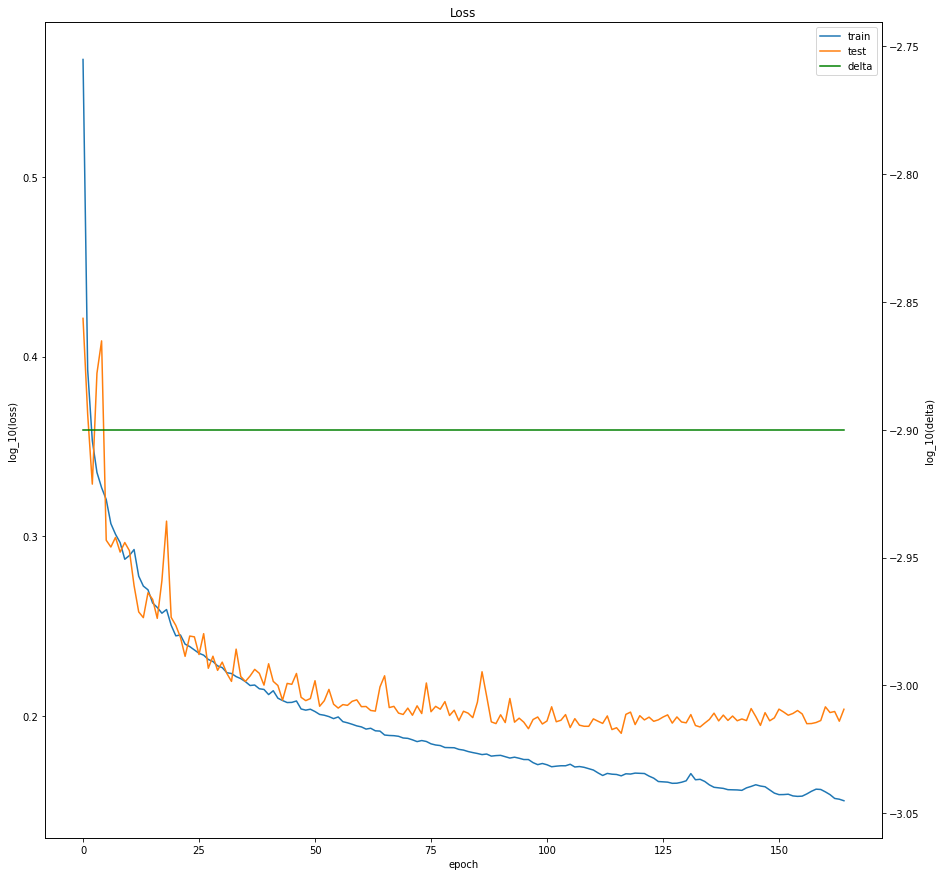

../entropia/mnist-repaired/losses_train_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#mnist;device#cuda:0;delta#0.001583819608766579_.txt


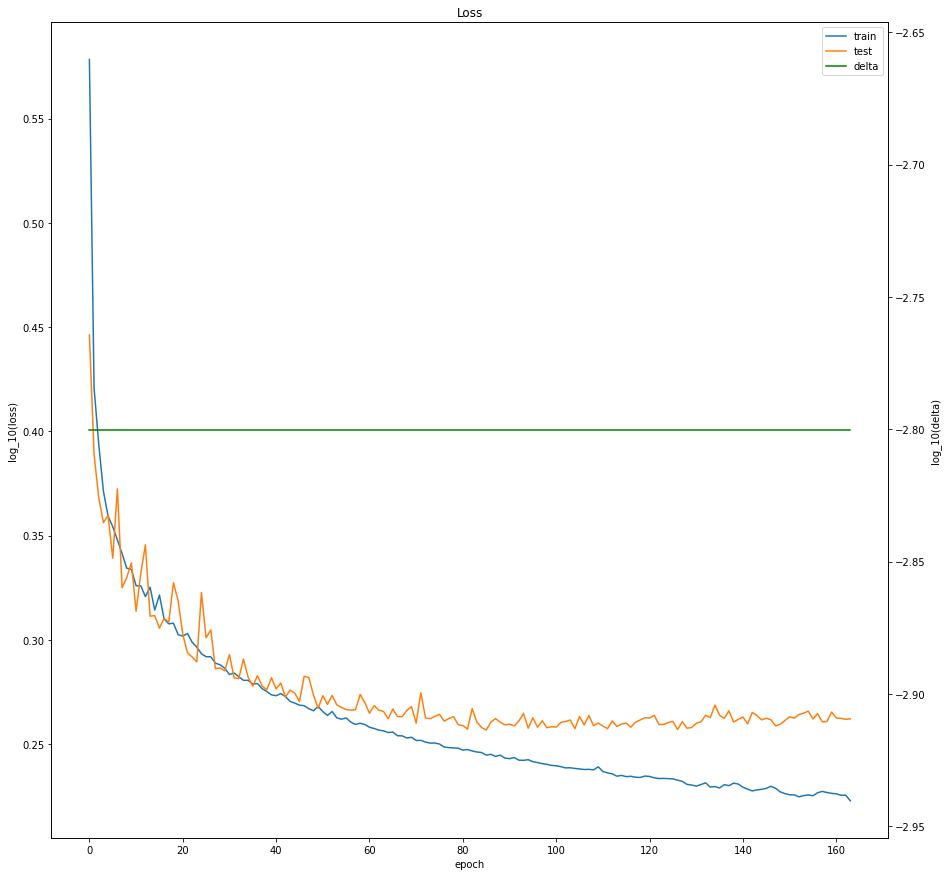

../entropia/mnist-repaired/losses_train_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#mnist;device#cuda:0;delta#0.0019932353156386882_.txt


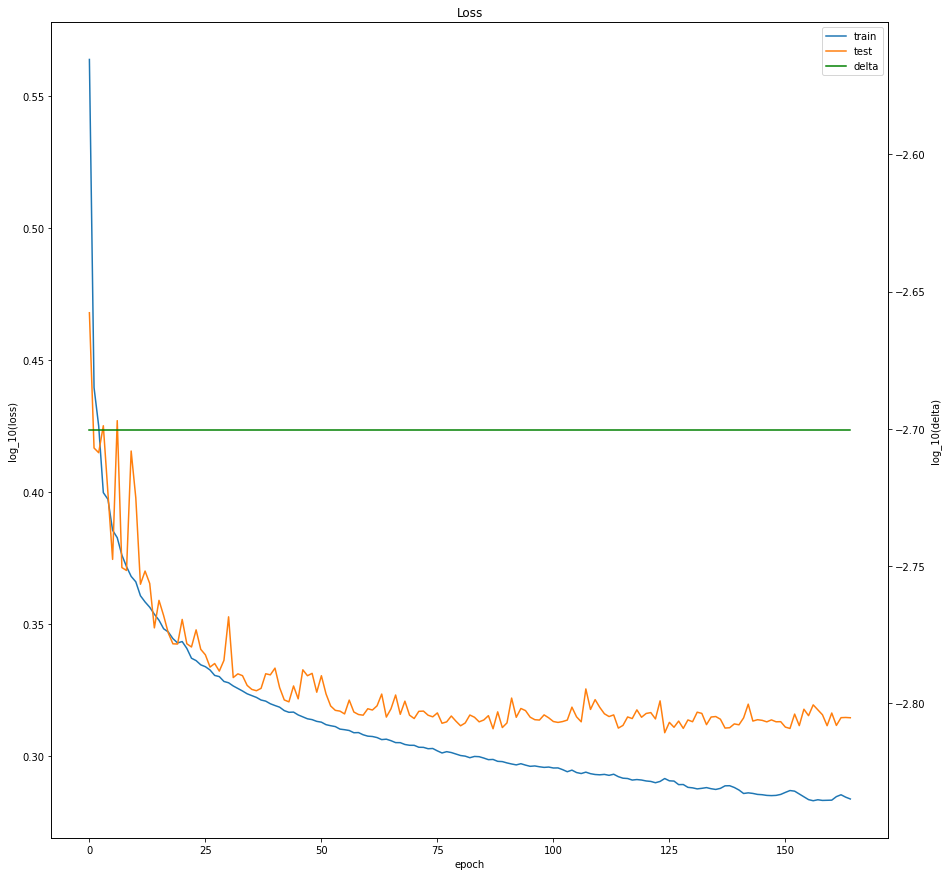

../entropia/mnist-repaired/losses_train_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#mnist;device#cuda:0;delta#0.001_.txt


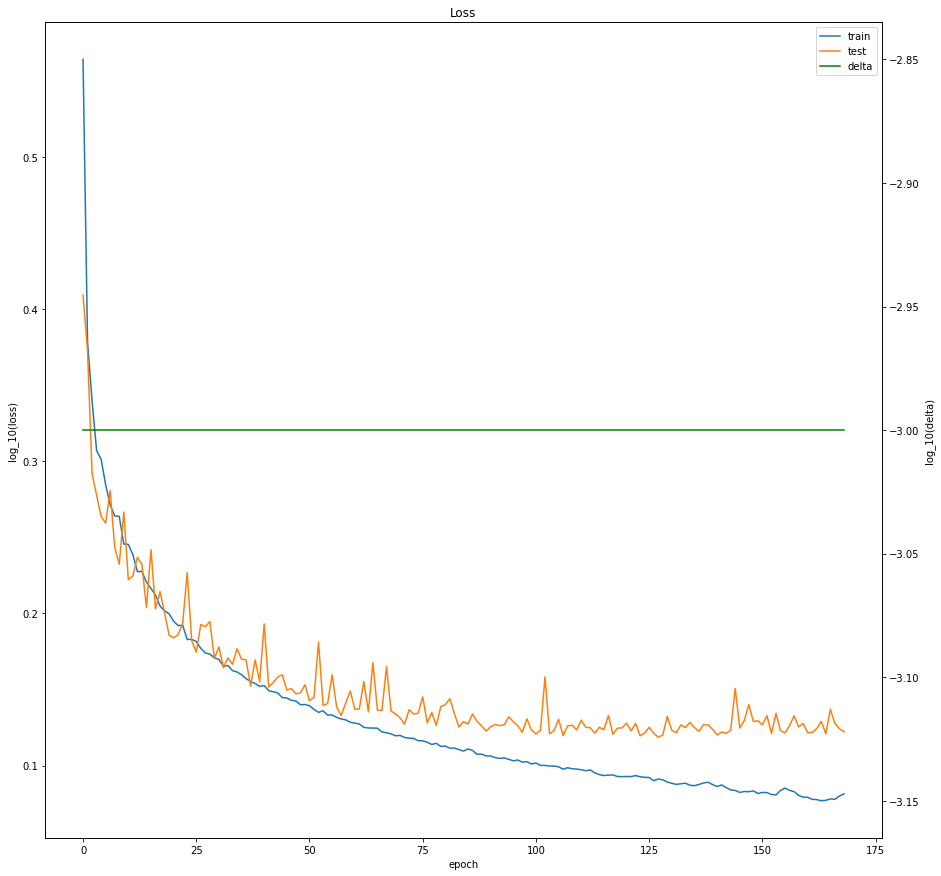

../entropia/mnist-repaired/losses_train_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#mnist;device#cuda:0;delta#0.002508484553113519_.txt


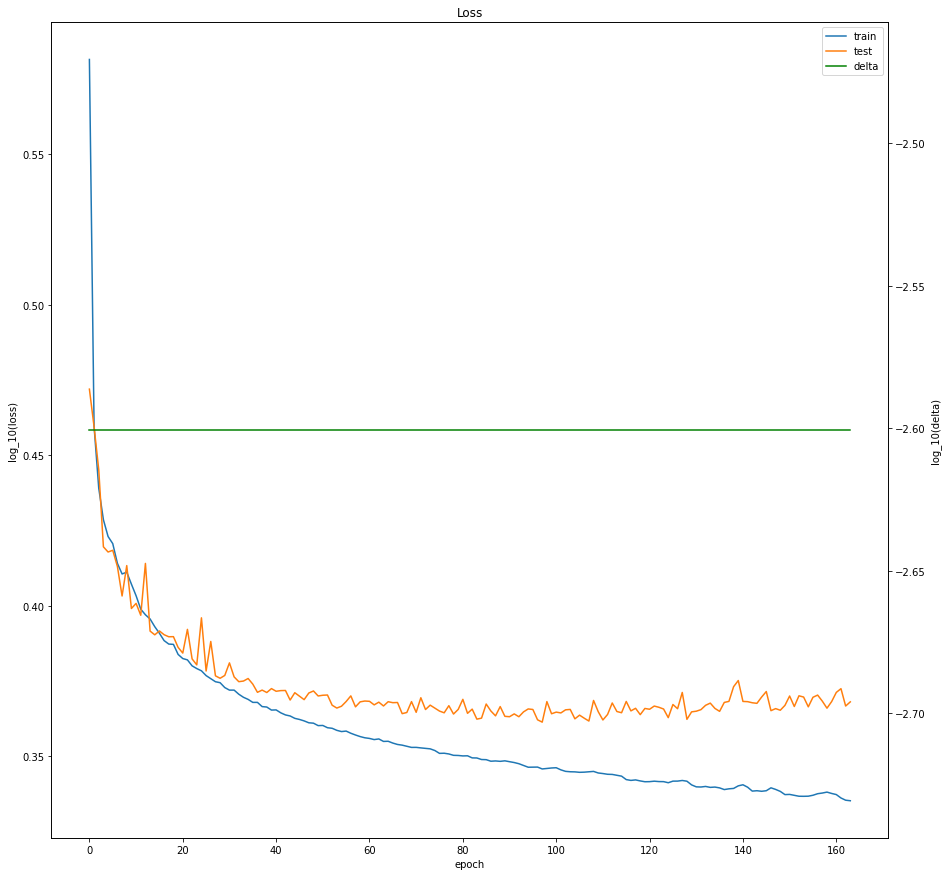

../entropia/mnist-repaired/losses_train_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#mnist;device#cuda:0;delta#0.0031569251777945977_.txt


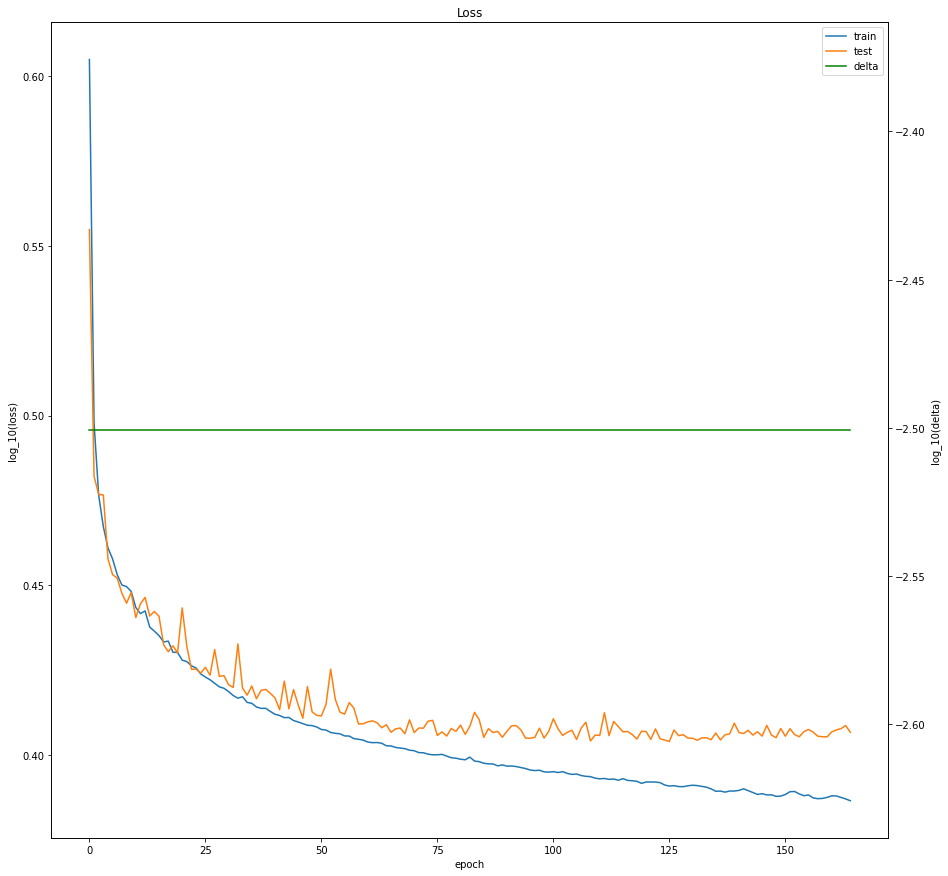

../entropia/mnist-repaired/losses_train_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#mnist;device#cuda:0;delta#0.003972987023509263_.txt


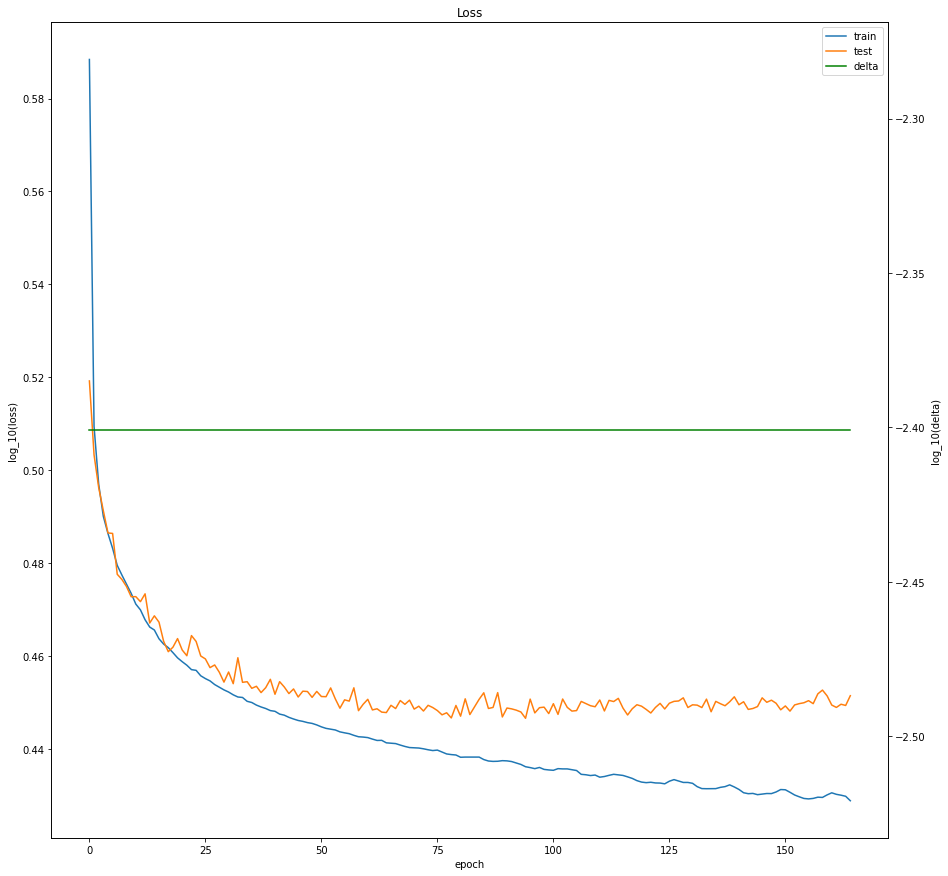

../entropia/mnist-repaired/losses_train_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#mnist;device#cuda:0;delta#0.005000000000000002_.txt


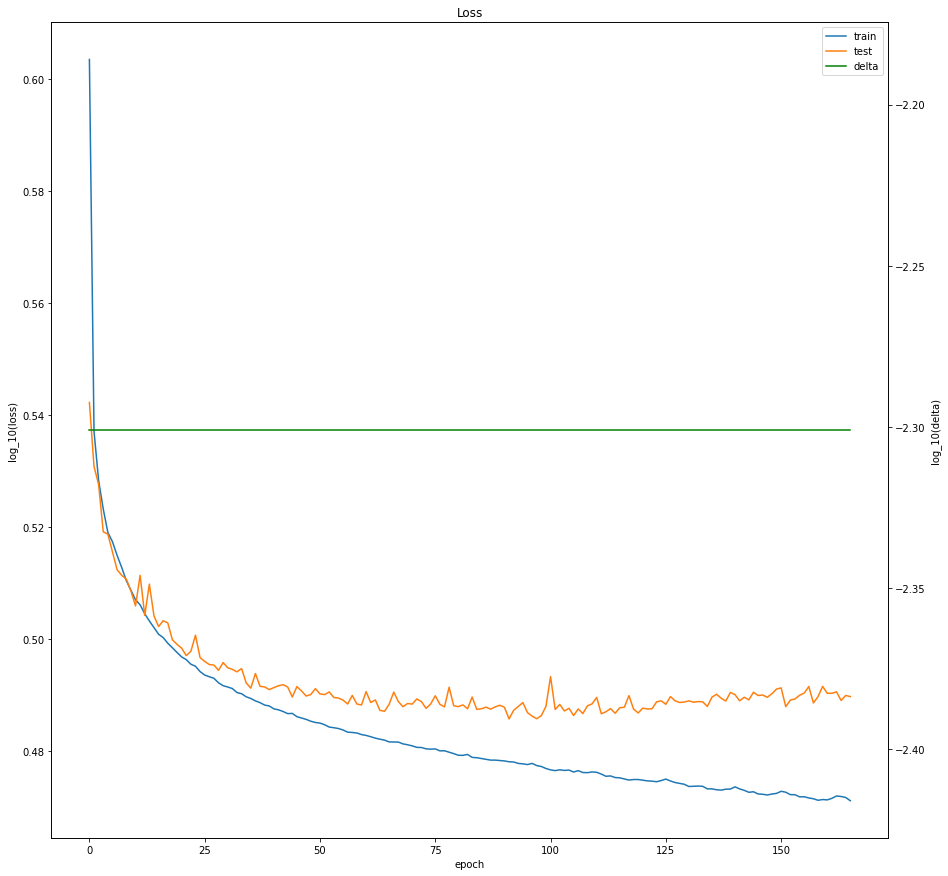

In [8]:
for f in sorted(glob.glob("../entropia/mnist-repaired/*train*")):
    print(f)
    plot_loss(f, start=0)

sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#mnist;device#cuda:0;delta#0.02_000010.png


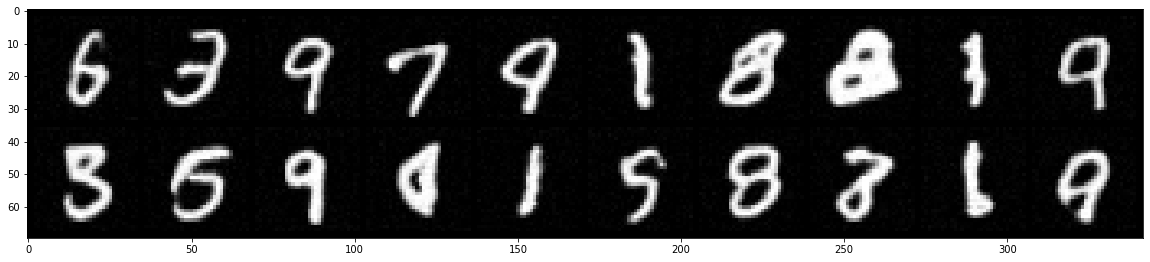

sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#mnist;device#cuda:0;delta#0.02_000020.png


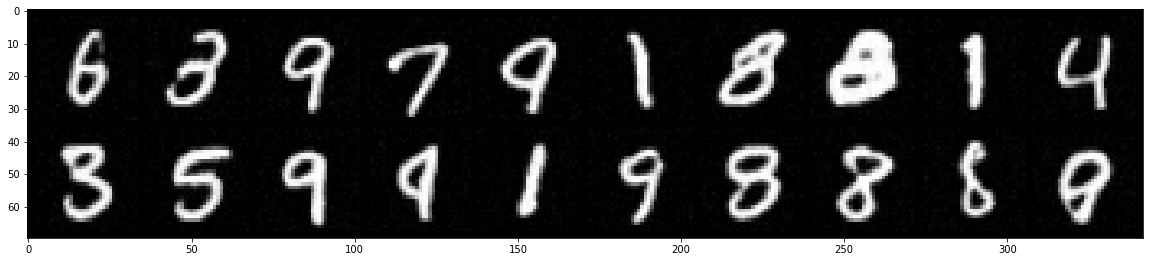

sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#mnist;device#cuda:0;delta#0.02_000030.png


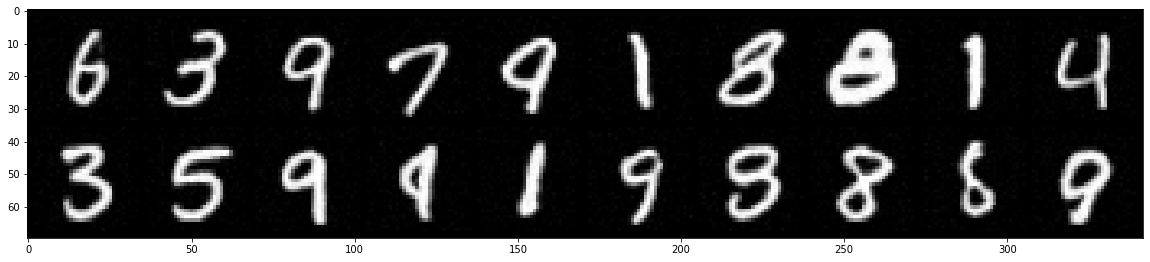

sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#mnist;device#cuda:0;delta#0.02_000040.png


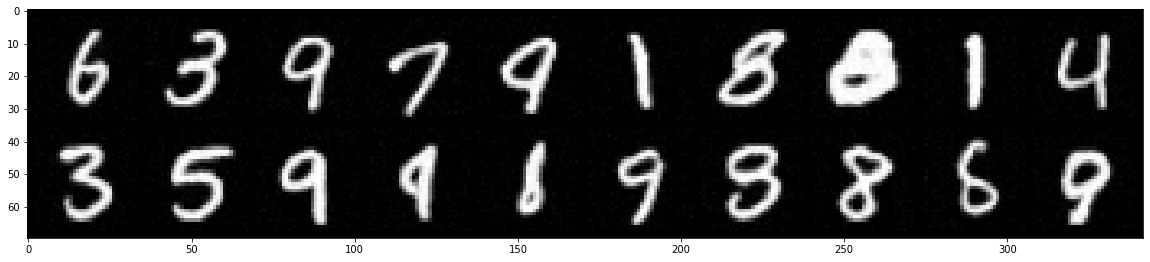

sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#mnist;device#cuda:0;delta#0.02_000050.png


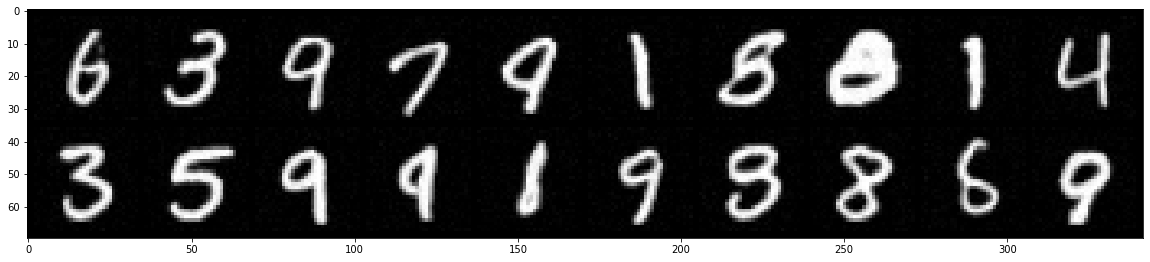

sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#mnist;device#cuda:0;delta#0.0163792745495583_000060.png


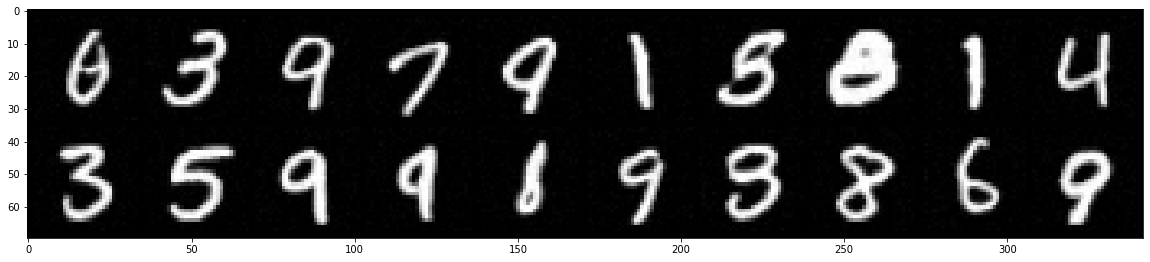

sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#mnist;device#cuda:0;delta#0.01341403173849042_000070.png


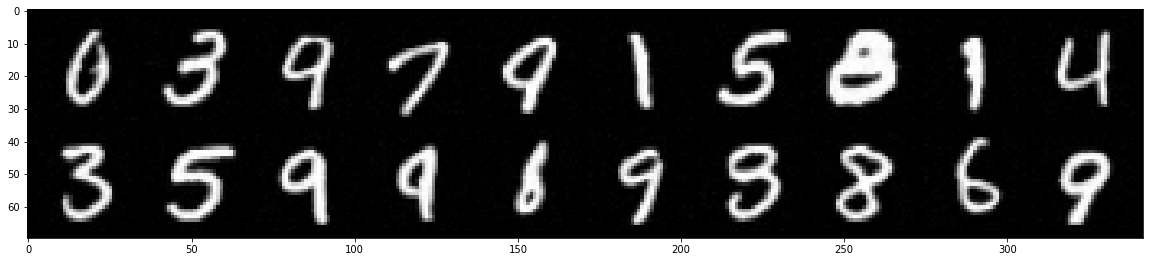

sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#mnist;device#cuda:0;delta#0.010985605433061174_000080.png


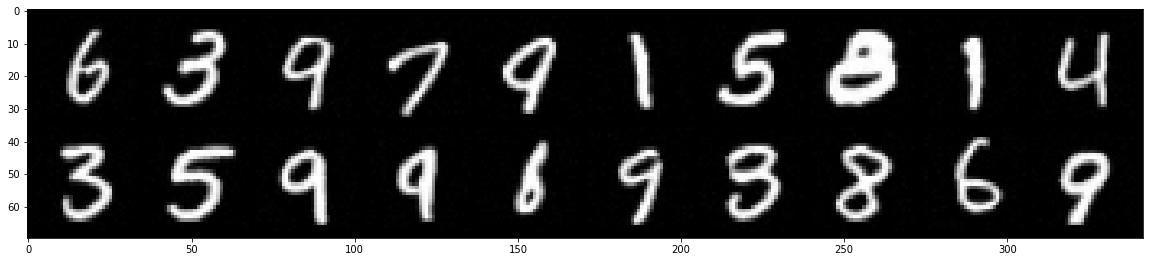

sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#mnist;device#cuda:0;delta#0.008996812374061419_000090.png


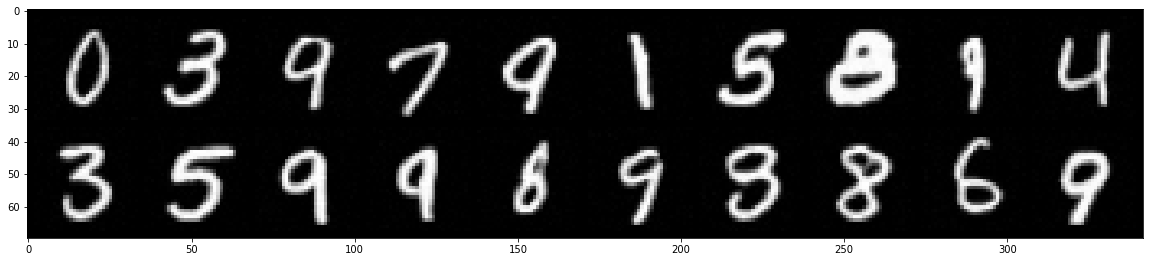

sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#mnist;device#cuda:0;delta#0.007368062997280772_000100.png


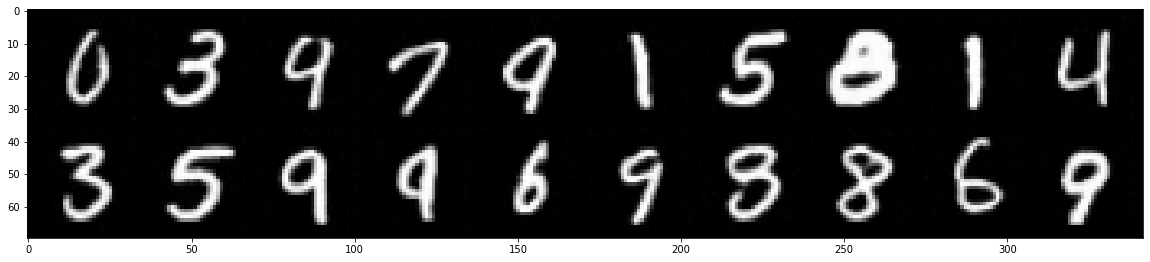

sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#mnist;device#cuda:0;delta#0.006034176336545162_000110.png


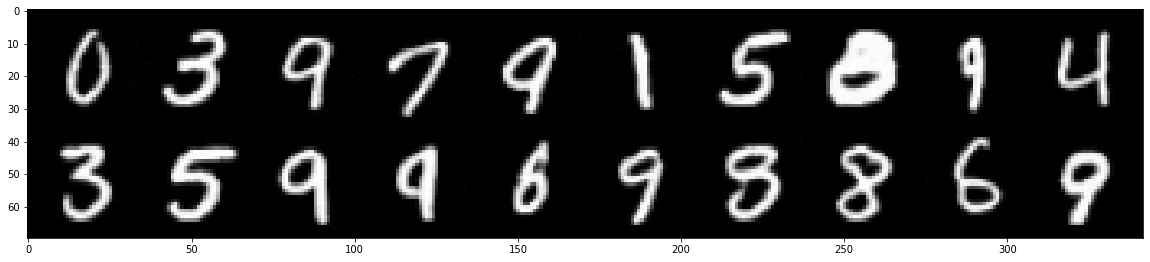

sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#mnist;device#cuda:0;delta#0.004941771544836058_000120.png


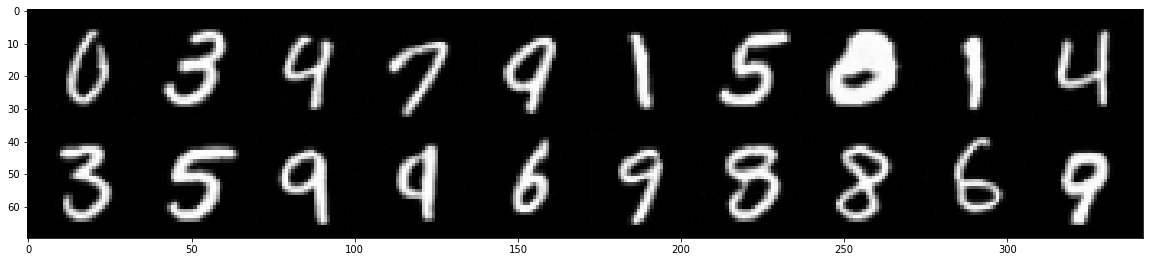

sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#mnist;device#cuda:0;delta#0.004047131644703234_000130.png


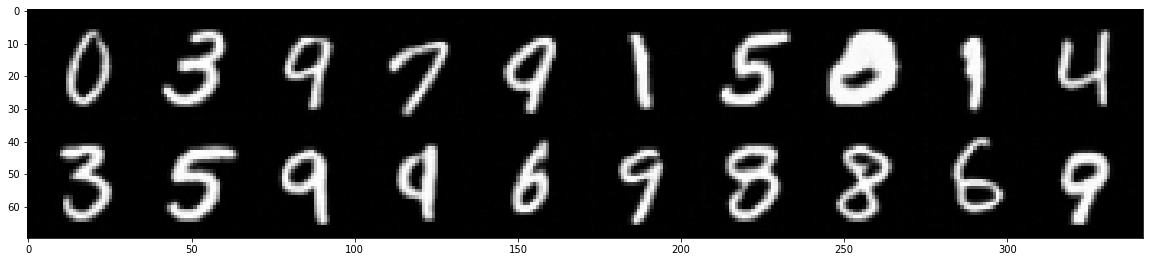

sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#mnist;device#cuda:0;delta#0.0033144540173399867_000140.png


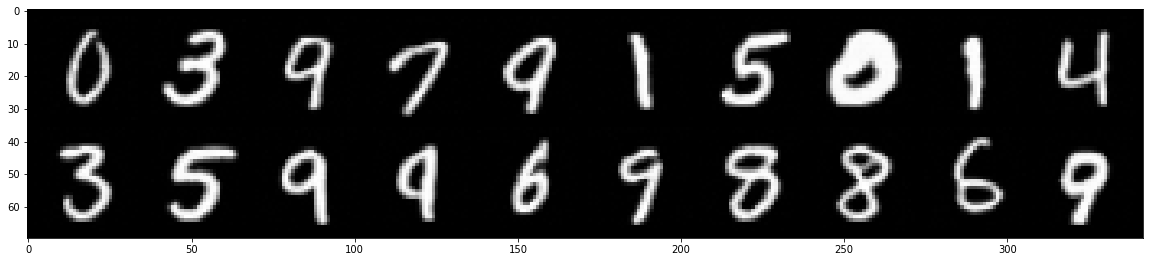

sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#mnist;device#cuda:0;delta#0.002714417616594907_000150.png


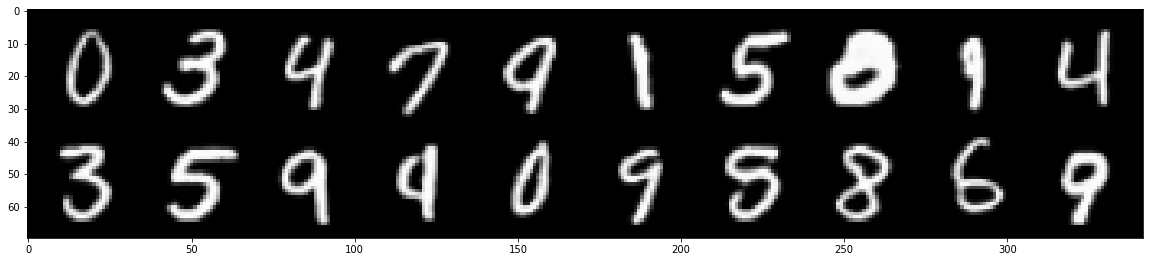

sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#mnist;device#cuda:0;delta#0.002223009569218284_000160.png


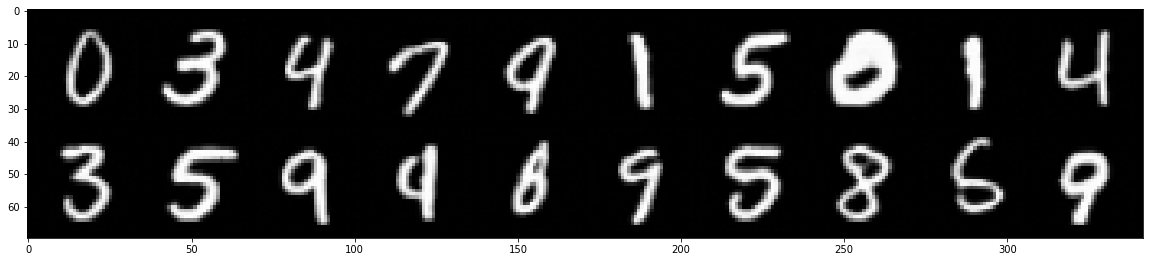

sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#mnist;device#cuda:0;delta#0.0018205642030260805_000170.png


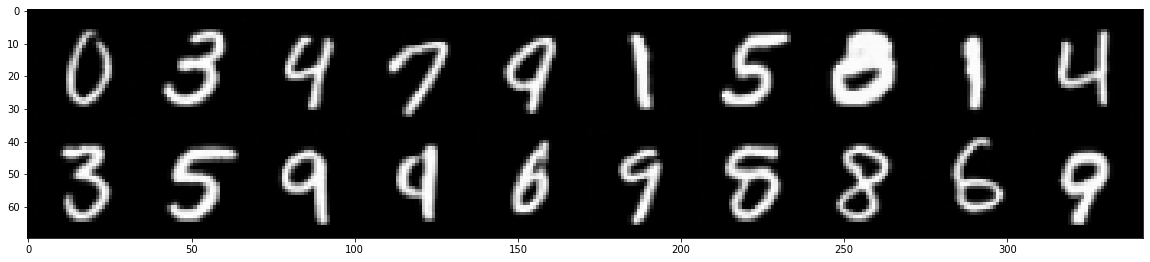

sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#mnist;device#cuda:0;delta#0.0014909760458230992_000180.png


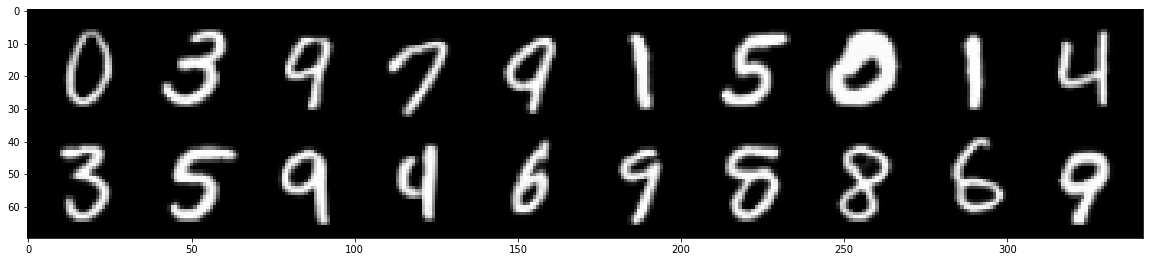

In [58]:
n = 10
for f in sorted(os.listdir("../sample"), key=lambda x: x.split("_")[-1]):
    if '0.png' in f:
        print(f)
        img = Image.open(f"../sample/{f}")
        plt.figure(figsize = (n*2, n*10))
        plt.imshow(img)
        plt.show()
        

In [58]:
# data = MNIST("/home/model/datasets/mnist/")
data = FashionMNIST("/home/model/datasets/fashion_mnist/")
X = data.train_data.numpy().reshape(60000, -1)/255
from sklearn.neighbors import NearestNeighbors

search = NearestNeighbors(n_neighbors=1)
search.fit(X)

/home/model/.virtualenvs/glow-pytorch/lib/python3.6/site-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


NearestNeighbors(n_neighbors=1)

In [59]:
neighbors = search.kneighbors(X[:1000], n_neighbors=2)

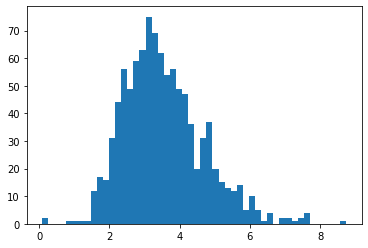

In [60]:
plt.hist(neighbors[0][:, 1], bins=50);

In [61]:
i1 = neighbors[0][:, 1].argmin()

In [68]:
i2 = neighbors[1][i1, 1]

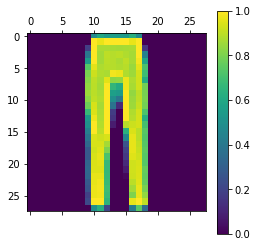

In [69]:
plt.matshow(X[i1].reshape(28,28))
plt.colorbar()

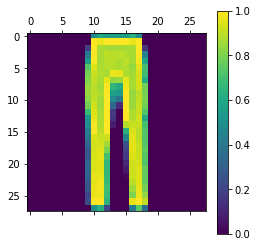

In [70]:
plt.matshow(X[i2].reshape(28,28))
plt.colorbar()

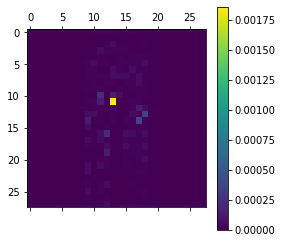

In [71]:
plt.matshow(((X[i2] - X[i1])**2).reshape(28,28))
plt.colorbar()

In [73]:
np.sqrt(((X[i2] - X[i1])**2).sum())

0.08636359037468719

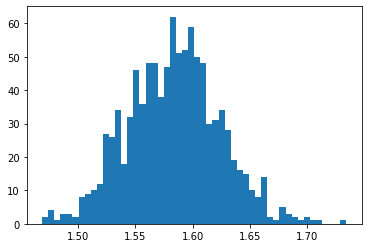

In [75]:
delta = 0.04
N = 1000
plt.hist(np.sqrt(((np.random.randn(N, 28*28)*delta - np.random.randn(N, 28*28)*delta)**2).sum(axis=1)), bins=50);

840